In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

Load the MNIST dataset

In [20]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [9 9 4 3 4 4 0 3 3 6]


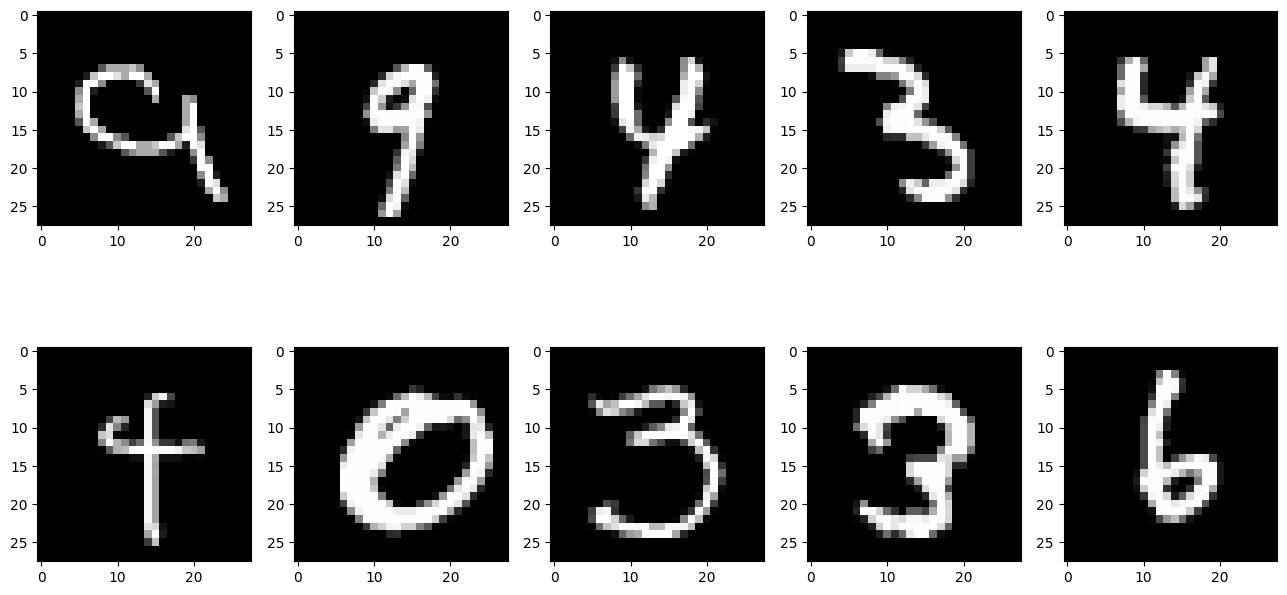

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ', train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
plt.show()

Pre-processing stage

In [23]:
new_train_data = train_data / 255.0
new_test_data = test_data / 255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [48]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))  # L2 regularization

# Modify hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [50]:
train_info = model.fit(new_train_data, new_train_target, epochs=num_epochs, batch_size=batch_size)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7876 - loss: 6.1564
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8779 - loss: 1.1618
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8839 - loss: 1.0341
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8918 - loss: 0.9621
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8927 - loss: 0.9177
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8946 - loss: 0.8884
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8931 - loss: 0.8761
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8986 - loss: 0.8555
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8990 - loss: 0.8393
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9019 - loss: 0.8287
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9018 - loss: 0.8249
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms

Plot the loss and accuracy graphs

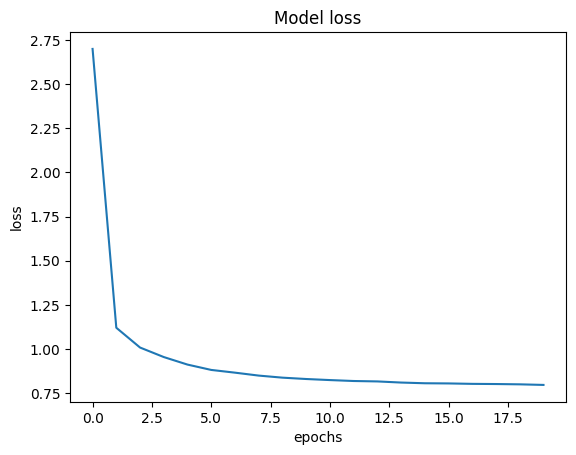

In [51]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

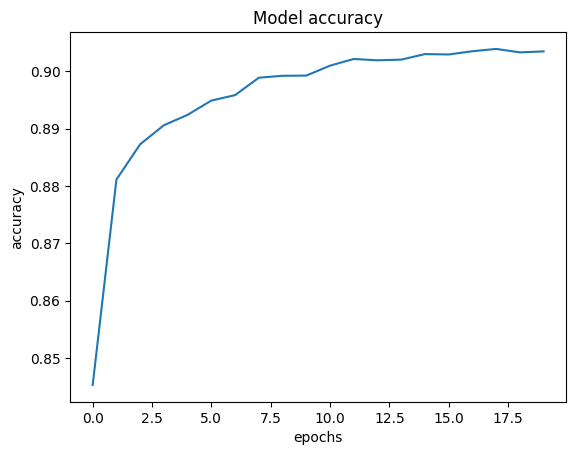

In [52]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Visualize Class-wise Test Dataset Performance Using a Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


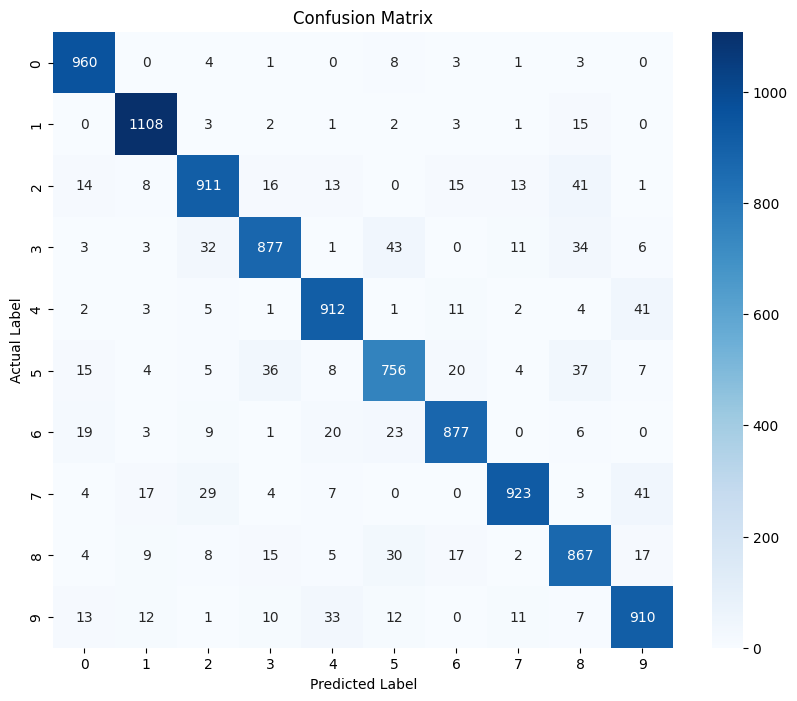

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
Y_pred = model.predict(new_test_data)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(new_test_target, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Test the performance of Model

In [56]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.8191
Loss of the Test dataset is: 0.7795420289039612
Accuracy of the test dataset is: 0.910099983215332


Save the model weights

In [57]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')